In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [12]:
import sys
sys.path.append("../")

In [13]:
from config import *

In [2]:
# paths
train_brain_h5 = h5py.File("/analysis/fabiane/data/MS/explMS/train_dataset_brain_masks_fullres.h5")
holdout_brain_h5 = h5py.File("/analysis/fabiane/data/MS/explMS/holdout_dataset_brain_masks_fullres.h5")
train_lesions_h5 = h5py.File("/analysis/fabiane/data/MS/explMS/train_dataset_lesions_fullres.h5")
holdout_lesions_h5 = h5py.File("/analysis/fabiane/data/MS/explMS/holdout_dataset_lesions_fullres.h5")

In [3]:
import pandas as pd

In [18]:
df = pd.read_csv("/analysis/fabiane/data/MS/explMS/file_list_HC_MS_BET_FLAIR.csv")

In [5]:
df.iloc[85:95]

,file,label,name,path,time
85,VIMS_MS_079_1_FLAIR.nii.gz,MS,VIMS_MS_079,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_07...,1.0
86,VIMS_MS_046_1_FLAIR.nii.gz,MS,VIMS_MS_046,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_04...,1.0
87,VIMS_MS_049_1_FLAIR.nii.gz,MS,VIMS_MS_049,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_04...,1.0
88,RS_GK_005_1_FLAIR.nii.gz,HC,RS_GK_005,/analysis/share/Ritter/MS/CIS/02_HC/RS_GK_005/...,1.0
89,VIMS_MS_072_1_FLAIR.nii.gz,MS,VIMS_MS_072,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_07...,1.0
90,VIMS_HC_097_1_FLAIR.nii.gz,HC,VIMS_HC_097,/analysis/share/Ritter/MS/CIS/02_HC/VIMS_HC_09...,1.0
91,VIMS_MS_001_1_FLAIR.nii.gz,MS,VIMS_MS_001,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_00...,1.0
92,RS_GK_023_1_FLAIR.nii.gz,HC,RS_GK_023,/analysis/share/Ritter/MS/CIS/02_HC/RS_GK_023/...,1.0
93,VIMS_MS_041_1_FLAIR.nii.gz,MS,VIMS_MS_041,/analysis/share/Ritter/MS/CIS/03_MS/VIMS_MS_04...,1.0
94,RS_GK_006_1_FLAIR.nii.gz,HC,RS_GK_006,/analysis/share/Ritter/MS/CIS/02_HC/RS_GK_006/...,1.0


In [6]:
lesion_masks_train = train_lesions_h5['masks']
lesion_masks_holdout = holdout_lesions_h5['masks']

In [7]:
brain_masks_train = train_brain_h5['masks']
brain_masks_holdout = holdout_brain_h5['masks']

In [8]:
np.max(lesion_masks_train)

1.0

In [44]:
np.max(lesion_masks_holdout)

1.0

In [10]:
len(lesion_masks_train)

124

In [22]:
# split dataframe
holdout_df = df.iloc[indices_holdout].reset_index()
train_df = df.drop(indices_holdout).reset_index()

In [43]:
train_df.groupby("label").count()

,index,file,name,path,time
label,,,,,
HC,61,61,61,61,61
MS,63,63,63,63,63


In [42]:
holdout_df.groupby("label").count()

,index,file,name,path,time
label,,,,,
HC,10,10,10,10,10
MS,13,13,13,13,13


In [31]:
# calculate ratio of all subjects with lesions
lesion_ratio = []
lesion_sum = []
lesion_sum_hc = []
lesion_sum_ms = []

for idx, row in train_df.iterrows():
    lm, bm = lesion_masks_train[idx], brain_masks_train[idx]
    if np.sum(lm) > 0:
        # catch scans without lesion masks i.e. contain random info
        if np.max(lm) != 1 and np.max(lm) != 0 and np.min(lm) != 0:
            print("No lesion mask")
        else:
            ratio = np.sum(lm)/np.sum(bm)
            lesion_ratio.append(ratio)
            lesion_sum.append(np.sum(lm))
            if row["label"] == "MS":
                lesion_sum_ms.append(np.sum(lm))
            else:
                lesion_sum_hc.append(np.sum(lm))

for idx, row in holdout_df.iterrows():
    lm, bm = lesion_masks_holdout[idx], brain_masks_holdout[idx]
    if np.sum(lm) > 0:
        # catch scans without lesion masks i.e. contain random info
        if np.max(lm) != 1 and np.max(lm) != 0 and np.min(lm) != 0:
            print("No lesion mask")
        else:
            ratio = np.sum(lm)/np.sum(bm)
            lesion_ratio.append(ratio)
            lesion_sum.append(np.sum(lm))
            if row["label"] == "MS":
                lesion_sum_ms.append(np.sum(lm))
            else:
                lesion_sum_hc.append(np.sum(lm))
    
print(np.mean(lesion_ratio))

No lesion mask
No lesion mask
No lesion mask
No lesion mask
0.004380442567354902


In [32]:
np.max(lesion_ratio)

0.05145555500148515

In [33]:
np.min(lesion_ratio)

7.279298494004132e-06

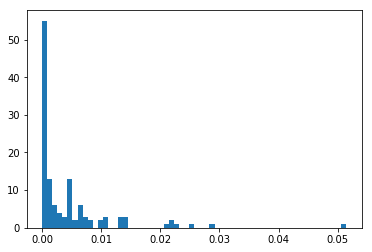

In [12]:
plt.hist(lesion_ratio, bins=60)
plt.show()

In [13]:
print("Mean lesion ratio {:.4f} %".format(np.mean(lesion_ratio) * 100))
print("Std lesion ratio {:.4f} %".format(np.std(lesion_ratio) * 100))
print("Max lesion ratio {:.4f} %".format(np.max(lesion_ratio) * 100))
print("Min lesion ratio {:.4f} %".format(np.min(lesion_ratio) * 100))

Mean lesion ratio 0.4380 %
Std lesion ratio 0.7160 %
Max lesion ratio 5.1456 %
Min lesion ratio 0.0007 %


In [51]:
# calculate sums of all subjects
lesion_sum = []
lesion_sum_hc = []
lesion_sum_ms = []

for idx, row in train_df.iterrows():
    lm, bm = lesion_masks_train[idx], brain_masks_train[idx]
    # catch scans without lesion masks i.e. contain random info
    if np.max(lm) != 1 and np.max(lm) != 0 and np.min(lm) != 0:
        print("No lesion mask in training. abel: {}".format(row["label"]))
    else:
        lesion_sum.append(np.sum(lm))
        if row["label"] == "MS":
            lesion_sum_ms.append(np.sum(lm))
        else:
            lesion_sum_hc.append(np.sum(lm))

for idx, row in holdout_df.iterrows():
    lm, bm = lesion_masks_holdout[idx], brain_masks_holdout[idx]
    # catch scans without lesion masks i.e. contain random info
    if np.max(lm) != 1 and np.max(lm) != 0 and np.min(lm) != 0:
        print("No lesion mask in holdout")
    else:
        lesion_sum.append(np.sum(lm))
        if row["label"] == "MS":
            lesion_sum_ms.append(np.sum(lm))
        else:
            lesion_sum_hc.append(np.sum(lm))

No lesion mask in training
No lesion mask in training
No lesion mask in training
No lesion mask in training


In [46]:
print("Mean lesion sum {:.2f}".format(np.mean(lesion_sum)))
print("Std lesion sum {:.2f}".format(np.std(lesion_sum)))
print("Max lesion sum {:.2f}".format(np.max(lesion_sum)))
print("Min lesion sum {:.2f}".format(np.min(lesion_sum)))

Mean lesion sum 4044.76
Std lesion sum 6851.58
Max lesion sum 47466.00
Min lesion sum 0.00


In [47]:
print("Mean lesion sum HC {:.2f}".format(np.mean(lesion_sum_hc)))
print("Std lesion sum HC {:.2f}".format(np.std(lesion_sum_hc)))
print("Max lesion sum HC {:.2f}".format(np.max(lesion_sum_hc)))
print("Min lesion sum HC {:.2f}".format(np.min(lesion_sum_hc)))

Mean lesion sum HC 571.78
Std lesion sum HC 1941.21
Max lesion sum HC 14977.00
Min lesion sum HC 0.00


In [48]:
print("Mean lesion sum MS {:.2f}".format(np.mean(lesion_sum_ms)))
print("Std lesion sum MS {:.2f}".format(np.std(lesion_sum_ms)))
print("Max lesion sum MS {:.2f}".format(np.max(lesion_sum_ms)))
print("Min lesion sum MS {:.2f}".format(np.min(lesion_sum_ms)))

Mean lesion sum MS 7283.08
Std lesion sum MS 8091.32
Max lesion sum MS 47466.00
Min lesion sum MS 121.00


In [49]:
len(lesion_sum_ms)

74

In [50]:
len(lesion_sum_hc)

69